In [20]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
import math


# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'cover_overview.csv')

# Load the CSV file
df = pd.read_csv(file_path)

# Drop the first column by index
df = df.drop(df.columns[0], axis=1)

# Renaming columns
df.rename(columns={'WMU ' : 'WMU', 'Simulation':'Simulation', 'Design':'Design','Mean_Sampler_Count': 'Mean sampler count', 'Mean_Cover_Area': 'Mean cover area (km2)', 'Mean_Cover_Percentage': 'Mean cover (%)', 'Mean_Line_Length': 'Mean line length (km)', 'Mean_Trackline_Length' : 'Mean trackline length (km)', 'Mean_Cyclic_Trackline_Length' : 'Mean cyclic trackline length (km)',
       'Mean_On_Effort':'Mean on effort (km)', 'Mean_Off_Effort':'Mean off effort (km)', 'Mean_Return_to_Home':'Mean return to home (km)',
       'Mean_Off_Effort_Return':'Mean off effort & return (km)', 'On_Effort_Percentage':'On effort (%)',
       'Off_Effort_Percentage':'Off effort (%)', 'Return_to_Home_Percentage':'Return to home (%)',
       'Off_Effort_Return_Percentage':'Off effort & return (%)', 'Number_of_Plots':'Number of plots'}, inplace=True)




# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'H_SG': 'H-SG',
    # 'Rnd': 'Rnd',
    # 'Sys': 'Sys',
    # 'ZZ': 'ZZ',
    # 'ZZC': 'ZZC',
    'FW_Sys': 'FW-Sys',
    'FW_ZZ': 'FW-ZZ',
    'QC_Sys': 'QC-Sys'
}
# Renaming the simulations
df['Simulation'] = df['Simulation'].replace(simulation_rename_dict)

In [11]:
print(df)
print(df.columns)

    WMU Simulation         Design  Mean sampler count  Mean cover area (km2)  \
0   501     FW-Sys     systematic               118.3                1332.09   
1   501      FW-ZZ       eszigzag               119.8                1330.83   
2   501       H-SG  segmentedgrid               204.6                1877.90   
3   501     QC-Sys     systematic               481.5                 149.27   
4   503     FW-Sys     systematic               147.0                1658.16   
5   503      FW-ZZ       eszigzag               140.3                1654.71   
6   503       H-SG  segmentedgrid               293.8                2845.31   
7   503     QC-Sys     systematic               743.5                 230.11   
8   512     FW-Sys     systematic               324.5                4038.44   
9   512      FW-ZZ       eszigzag               344.3                4036.03   
10  512       H-SG  segmentedgrid               680.5                7118.49   
11  512     QC-Sys     systematic       

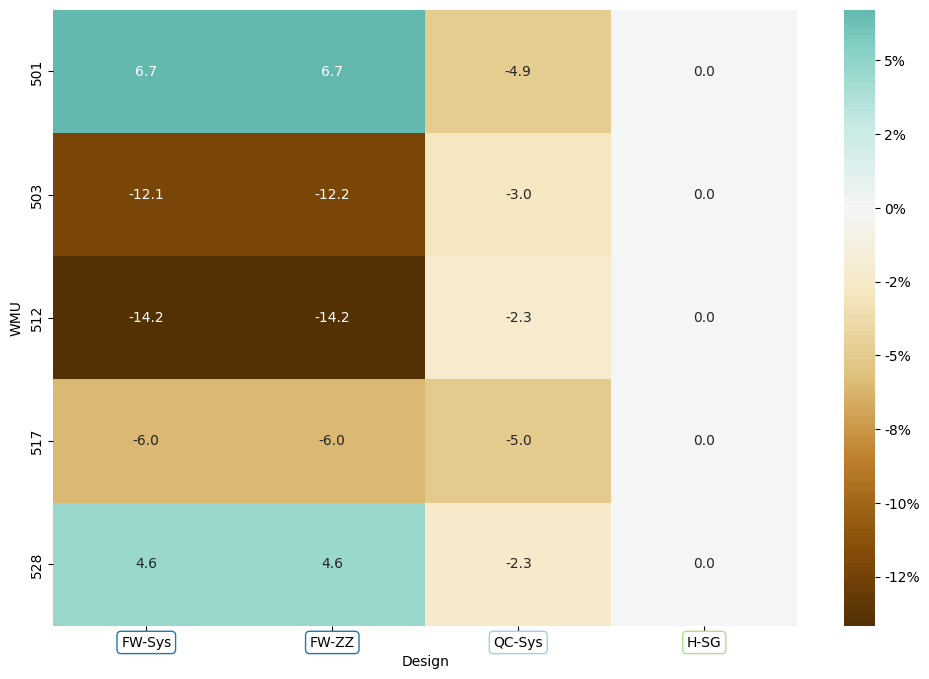

In [50]:
# Filter the DataFrame to include only relevant columns
df_filtered = df[['WMU', 'Simulation', 'Mean line length (km)']]

# Pivot the DataFrame to have WMU as index and Simulation as columns
df_pivot = df_filtered.pivot(index='WMU', columns='Simulation', values='Mean line length (km)')

# Define the desired order of the columns
desired_order = ['FW-Sys', 'FW-ZZ','QC-Sys', 'H-SG']  # Replace with your actual column names

# Reorder the DataFrame columns
df_pivot = df_pivot[desired_order]

# Calculate the proportional difference from H-SG for each WMU
df_diff = df_pivot.subtract(df_pivot['H-SG'], axis=0).divide(df_pivot['H-SG'], axis=0) * 100

# Create the heatmap
plt.figure(figsize=(12, 8))
# Define a custom annotation function to add a percentage sign
def annot_format(data):
    return f'{data:.1f}%'

ax = sns.heatmap(df_diff, cmap='BrBG', center=0, annot=True, fmt='.1f', annot_kws={"size": 10}, cbar_kws={'format': '%.0f%%'})


# Define colors for each group of simulations
colors = ['#1f78b4', '#1f78b4', '#a6cee3','#b2df8a']

# Add colored borders around the x-axis labels
for tick_label, color in zip(ax.get_xticklabels(), colors):
    tick_label.set_bbox(dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3'))

# Keep the font color black
for tick_label in ax.get_xticklabels():
    tick_label.set_color('black')

# plt.title('Heatmap of Proportional Mean Line Length Differences')
plt.xlabel('Design')
plt.ylabel('WMU')
plt.show()

In [100]:
# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'coverage_score.csv')

# Load the CSV file
coverage_df = pd.read_csv(file_path)

# Drop the first column by index
coverage_df = coverage_df.drop(coverage_df.columns[0], axis=1)

# Renaming columns
coverage_df.rename(columns={'Simulation':'Simulation', 'Min  ':'Min  ','First_Qu': 'First quantile', 'Median': 'Median', 'Mean': 'Mean', 'Third_Qu': 'Third quantile', 'Max' : 'Max', 'Group' : 'Group'}, inplace=True)



# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'H-SG': 'Helicopter',
    'FW-Sys': 'Fixed-wing Systematic',
    'FW-ZZ': 'Fixed-wing Zigzag',
    'QC-Sys': 'Quadcopter'
}

# Renaming the simulations
coverage_df['Group'] = coverage_df['Group'].replace(simulation_rename_dict)

# Define the custom order for the groups
custom_order = ['Fixed-wing Systematic', 'Fixed-wing Zigzag', 'Quadcopter', 'Helicopter']

# Convert the Group column to a categorical type with the specified order
coverage_df['Group'] = pd.Categorical(coverage_df['Group'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the Group column
coverage_df = coverage_df.sort_values('Group')

# Define custom colors for each group
group_colors = {
    "Fixed-wing Systematic": "#1f78b4", # Orange
    "Fixed-wing Zigzag": "#1f78b4",  # Purple
    "Quadcopter": "#a6cee3",  # Dark Purple
    "Helicopter": "#b2df8a"   # Pink
}


In [101]:
print(coverage_df)
print(coverage_df.columns)

           Simulation   Min  First quantile  Median      Mean  Third quantile  \
0   FW_Sys_design_501  0.00            0.00    1.00  0.623660            1.00   
1   FW_Sys_design_503  0.00            0.00    0.98  0.514039            1.00   
2   FW_Sys_design_512  0.00            0.00    0.69  0.499134            1.00   
3   FW_Sys_design_517  0.00            0.00    1.00  0.545593            1.00   
4   FW_Sys_design_528  0.00            0.00    1.00  0.613732            1.00   
8    FW_ZZ_design_517  0.00            0.00    0.90  0.545999            1.00   
7    FW_ZZ_design_512  0.00            0.00    0.70  0.499289            1.00   
9    FW_ZZ_design_528  0.00            0.00    0.93  0.614023            1.01   
5    FW_ZZ_design_501  0.00            0.00    0.95  0.626565            1.01   
6    FW_ZZ_design_503  0.00            0.00    0.78  0.512412            1.00   
18  QC_Sys_design_517  0.00            0.00    0.00  0.071566            0.20   
15  QC_Sys_design_501  0.00 

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_39100\2152156639.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Mean', data=coverage_df, palette=palette)


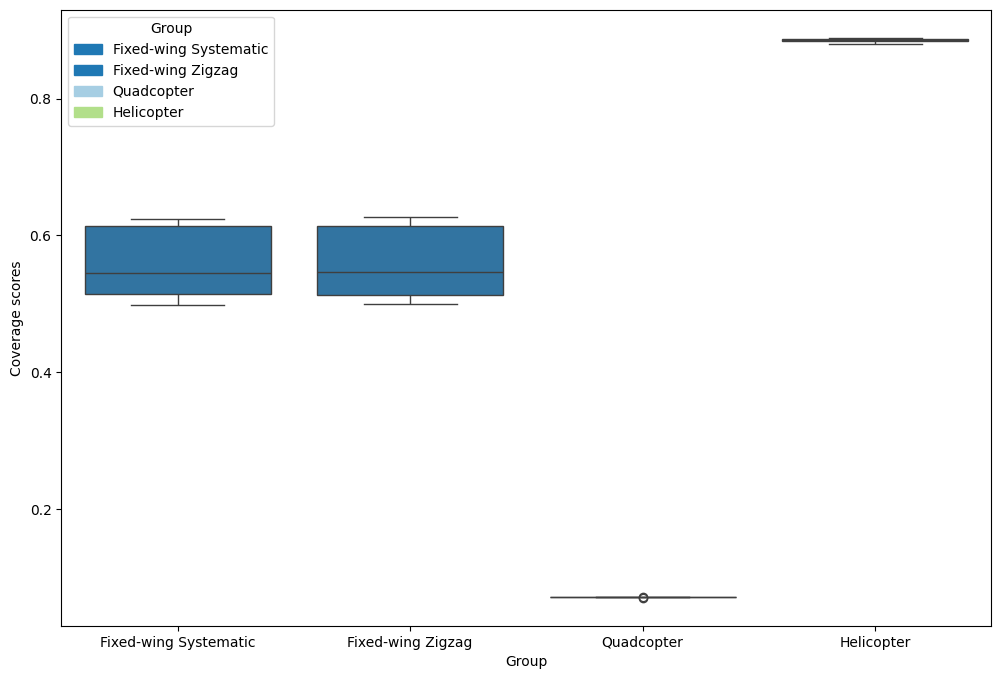

In [ ]:

# Create a color palette based on the group colors
palette = [group_colors[group] for group in coverage_df['Group'].unique()]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='Mean', data=coverage_df, palette=palette)

# Create custom legend
handles = [mpatches.Patch(color=color, label=group) for group, color in group_colors.items()]
plt.legend(handles=handles, title='Group')


plt.xlabel('Design')
plt.ylabel('Coverage scores')
# plt.title('Box Plot Grouped by Group with Custom Colors')
plt.show()

In [103]:
coverage_df

,Simulation,Min,First quantile,Median,Mean,Third quantile,Max,Group
0,FW_Sys_design_501,0.00,0.00,1.00,0.623660,1.00,1.00,Fixed-wing Systematic
1,FW_Sys_design_503,0.00,0.00,0.98,0.514039,1.00,1.00,Fixed-wing Systematic
2,FW_Sys_design_512,0.00,0.00,0.69,0.499134,1.00,1.00,Fixed-wing Systematic
3,FW_Sys_design_517,0.00,0.00,1.00,0.545593,1.00,1.00,Fixed-wing Systematic
4,FW_Sys_design_528,0.00,0.00,1.00,0.613732,1.00,1.00,Fixed-wing Systematic
8,FW_ZZ_design_517,0.00,0.00,0.90,0.545999,1.00,1.32,Fixed-wing Zigzag
7,FW_ZZ_design_512,0.00,0.00,0.70,0.499289,1.00,1.23,Fixed-wing Zigzag
9,FW_ZZ_design_528,0.00,0.00,0.93,0.614023,1.01,1.30,Fixed-wing Zigzag
5,FW_ZZ_design_501,0.00,0.00,0.95,0.626565,1.01,1.29,Fixed-wing Zigzag
6,FW_ZZ_design_503,0.00,0.00,0.78,0.512412,1.00,1.27,Fixed-wing Zigzag


C:\Users\lhambrec\AppData\Local\Temp\ipykernel_39100\2971248988.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = coverage_df.groupby('Group').agg({
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_39100\2971248988.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=melted_df, palette=palette)


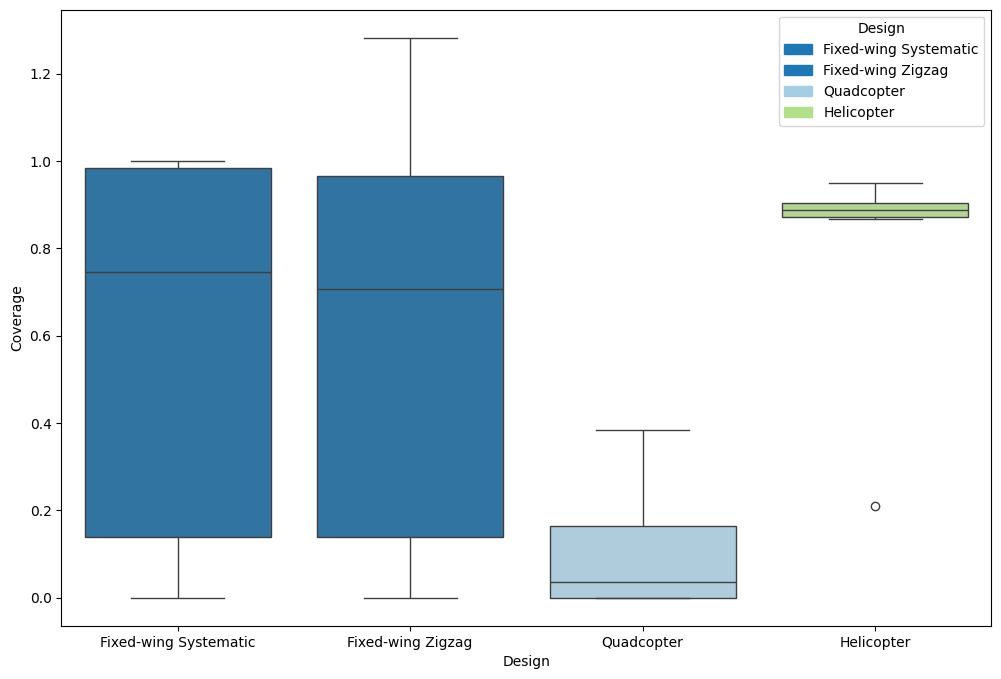

In [106]:
# Calculate the required statistics for each simulation
aggregated_df = coverage_df.groupby('Group').agg({
    'Min': 'mean',
    'First quantile': 'mean',
    'Median': 'mean',
    'Mean': 'mean',
    'Third quantile': 'mean',
    'Max': 'mean'
}).reset_index()

# Melt the dataframe
melted_df = aggregated_df.melt(id_vars=['Group'], var_name='Metric', value_name='Value')


# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='Value', data=melted_df, palette=palette)


# Create custom legend
handles = [mpatches.Patch(color=color, label=group) for group, color in group_colors.items()]
plt.legend(handles=handles, title='Design')

plt.xlabel('Design')
plt.ylabel('Coverage')
# plt.title('Box Plot Grouped by Simulation with Custom Colors')
plt.show()